<a href="https://colab.research.google.com/github/shuken1019/Python25study/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C_%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#인공신경망을 구성하는 절차
#1.더미데이터 준비(이미지데이터)
#2.훈련용,검증용,테스트용으로 나눔
#3.심층을 만듬(dense)
#4.model에 적용
#5.컴파일 진행(최적화기법을 적용:adam)
#6.fit(훈련)
#7.evaluate(검증)

In [ ]:
#드롭아웃: 군데군데 구멍을 뚫음 랜덤이기때문에(에포크가 많기 때문에) 학습률을 줄임
#손실곡선: fit() 메서드로 모델을 훈련하는 동안 훈련과정이
#상세하게 출력되어 확인 할 수 있다.(에포크 횟수, 손실, 정확도)
#아래쪽에 이 출력 메시지가 나옴
#코렙 노트북에 코드셀은 print()명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력

#다시말해 fit() 메서드는 History라는 클래스 객체를 반환함(훈련과정의 지표, 손실, 정확도 등 내장)
#이 값을 잘 활용하면 그래프를 그릴 수 있다.

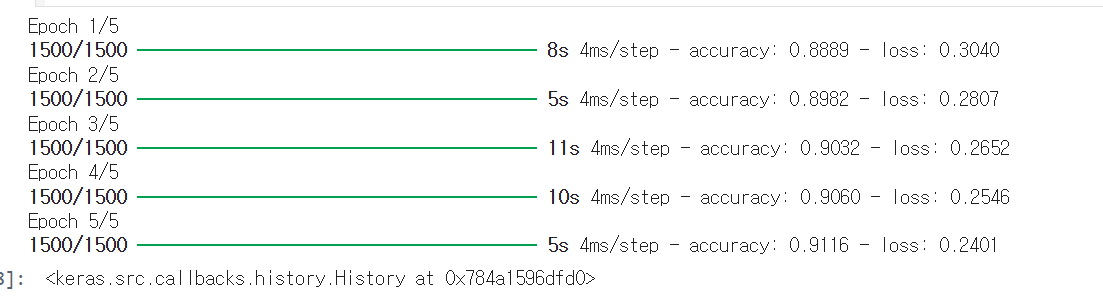

In [4]:
import tensorflow as tf #더미데이터 준비

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()
    #엔터효과 제거용 \->한줄로 긴 문장을 자름.
train_scaled=train_input/255.0
train_scaled,val_scaled, train_target ,val_target=train_test_split(
    train_scaled, train_target,test_size=0.2, random_state=42)

In [5]:
print("훈련데이터:")
print(train_scaled.shape,train_target.shape)
print("테스트데이터:")
print("검증데이터:")
print(val_scaled.shape,val_target.shape)

훈련데이터:
(48000, 28, 28) (48000,)
테스트데이터:
검증데이터:
(12000, 28, 28) (12000,)


In [8]:
#모델을 만드는 함수를 정의함(하나의 매개변수를 받아 리턴).model_fn(dense추가하면 생성)
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) #반복적으로 사용되는 입력층
    model.add(keras.layers.Dense(100,activation='relu')) #relu를 이용해 뉴런을 100개로 만들어라 반복적으로 사용되는 2진분류층

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
        model.add(a_layer)                                  # True일때 매개값으로 넘어오는 추가되는 층
    model.add(keras.layers.Dense(10, activation='softmax')) # 반복적으로 사용되는 다중분류 층
    return model


In [9]:
model=model_fn() #위에서 만든 메서드를 호출하여 모델에 담음
#model_fn(매개값이 없으면 그냥 생성, 매개값이 있으면 모델추가용)
model.summary() #모델의 요약정보를 봄

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    #다중분류                                   #정확도

In [13]:
#fit()메서드 결과를 history 변수에 담아봄
history=model.fit(train_scaled,train_target, epochs=5,verbose=2)#26초 걸림
#                                                     훈련과정 출력을 조절함
#                           verbose=0 훈련과정을 나타내지 않음
#                           verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
#                           verbose=2 진행막대 빼고 출력


Epoch 1/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8112 - loss: 0.5311
Epoch 2/5
1500/1500 - 5s - 4ms/step - accuracy: 0.8586 - loss: 0.3903
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8729 - loss: 0.3523
Epoch 4/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8810 - loss: 0.3306
Epoch 5/5
1500/1500 - 8s - 5ms/step - accuracy: 0.8873 - loss: 0.3141


In [14]:
print(history)#위에 fit한 결과를 history 객체가 가지고 잇는데 이것을 history변수에 담음

In [15]:
print(history.history.keys())
#훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
#정확도 accuracy, 손실 loss값이 잇다.
#정확도는 compile()메서드의 metrics 매개변수에 accuracy를 추가했기 때문에
#history 속성에 포함되어있음

dict_keys(['accuracy', 'loss'])


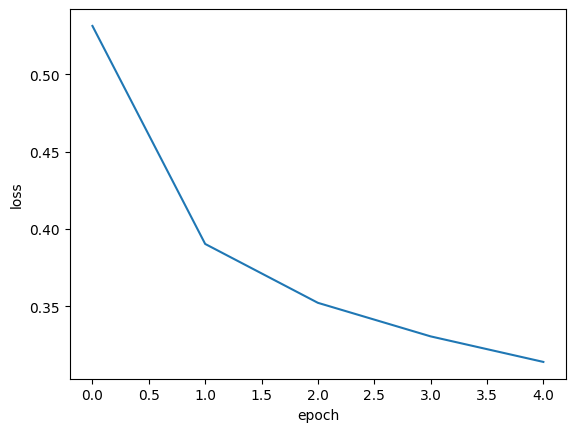

In [17]:
import matplotlib.pyplot as plt
#history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
#순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss'])#손실율을 차트로 표시
plt.xlabel('epoch')
#파이썬 인덱스는 0부터 시작함 5개의 에포크가 0~4까지 x축에 표현
plt.ylabel('loss')#손실된 값
plt.show()
#케라스는 손실율이 중요함 누수가 없어야함.

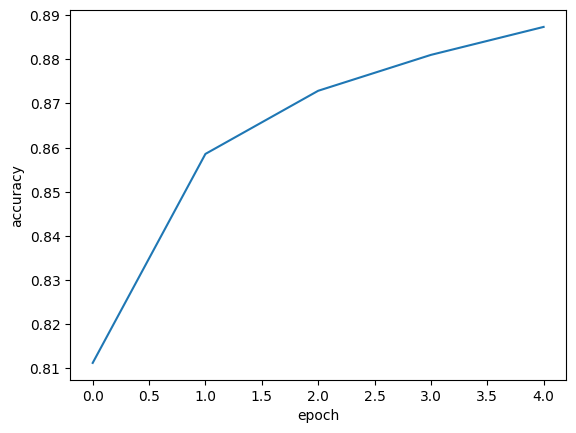

In [18]:
#이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#결과분석: 에포크마다 손실이 감소하고 정확도가 향상됨


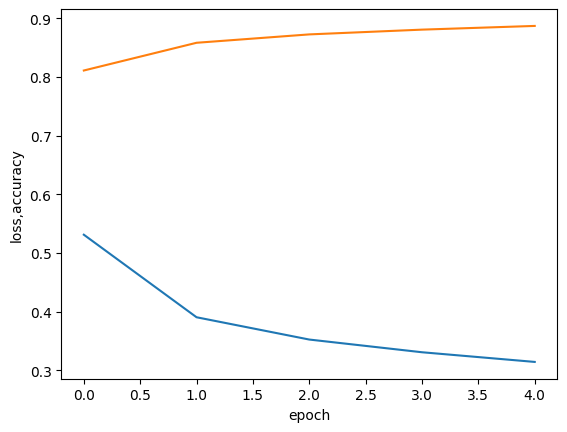

In [19]:
#손실율과 정확도를 합쳐보자
plt.plot(history.history['loss'])#손실율
plt.plot(history.history['accuracy'])#정확도
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.show()

In [20]:
#5번 돌리니까 점점 누움그래서
#이번에는 에포크 횟수를 20번으로 늘려서 보자
model=model_fn()#위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20, verbose=0)#1분정도 걸림

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


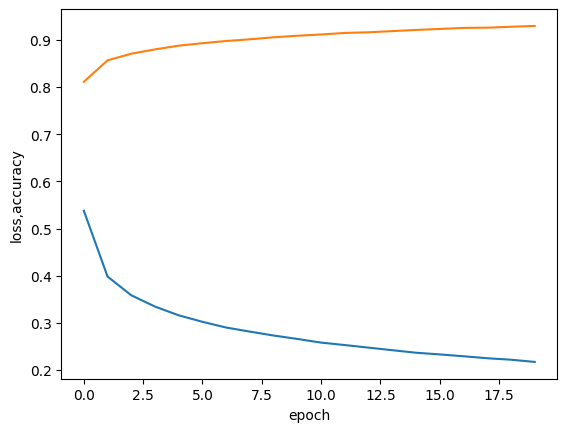

In [21]:
plt.plot(history.history['loss'])#손실율
plt.plot(history.history['accuracy'])#정확도
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.show()


In [22]:
#검증손실 validation_data=(val_scaled, val_target)
#예전에 확률적 경사 하강법을 사용 했을 때 과대/과서 적합과 에포크 사이에 관계부분이 있었다.
#인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨
#에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트에 대한 점수도 필요함
#그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다.
#검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

## keypoint https://wikidocs.net/236194
#손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
#인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수임(얼마나 누수가 발생했는가)
#손실 감소에 비례하여 정확도가 높여지지 않는 경우도 있는데
#모델이 잘 훈련 되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법임


In [28]:
model=model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target))
                                                          #검증손실을 구하기 위한 매개값 추가됨 3분 걸림

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7646 - loss: 0.6757 - val_accuracy: 0.8488 - val_loss: 0.4273
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8510 - loss: 0.4070 - val_accuracy: 0.8543 - val_loss: 0.4093
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8674 - loss: 0.3606 - val_accuracy: 0.8565 - val_loss: 0.4015
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8794 - loss: 0.3357 - val_accuracy: 0.8587 - val_loss: 0.3974
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8871 - loss: 0.3169 - val_accuracy: 0.8610 - val_loss: 0.3930
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8936 - loss: 0.3051 - val_accuracy: 0.8637 - val_loss: 0.3919
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8995 - loss: 0.2918 - val_accuracy: 0.8705 - val_loss: 0.3859
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9022 - loss: 0.2846 

In [26]:
print(history.history.keys())
#정확도 accuracy,손실 loss값이 있다.
#추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss'])


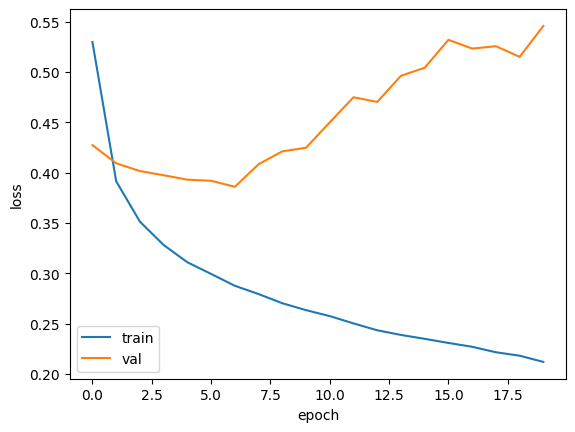

In [29]:
#과대/과소 적합 문제를 조사하기 위해서 훈련손실, 검증손실을 한 그래프에 그려서 비교해보자.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#결과분석; 초기에 검증손실이 감소하다가(과대적합) 다섯번째 에포크 만에 다시 상승함
#훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어짐
#검증손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
#검증세트에 대한 정확도가 증가할 거 같다.

#과대적합을 막기위한 방법으로 예전에 사용했던 규제방식대신에
#신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자

<function matplotlib.pyplot.show(close=None, block=None)>

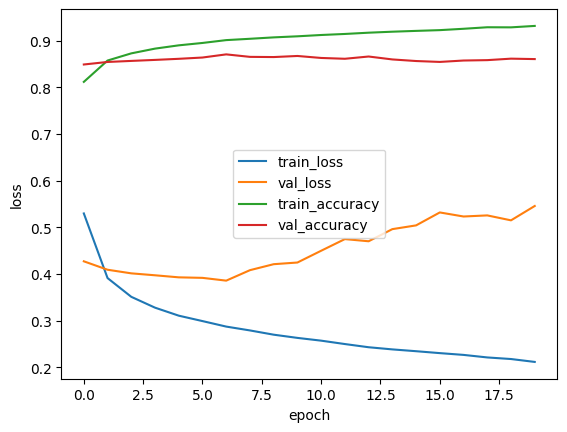

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy','val_accuracy'])
plt.show

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


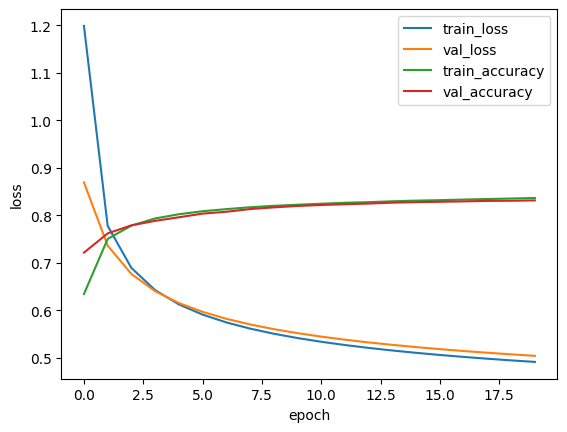

In [32]:
model=model_fn()
adagrad=keras.optimizers.Adagrad()#Adagrad기법으로 최적화 후 차트를 보자
model.compile(optimizer=adagrad,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy','val_accuracy'])
plt.show()

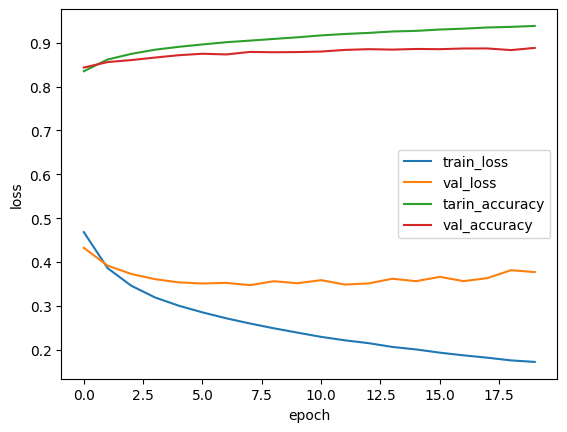

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))#2분 25초 걸림

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()
# 3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보인다.
# 대신 과대적합을 막기위한 기법이 필요해 보인다.

In [ ]:
#드롭아웃(Dropout)은 딥러닝의 기초가 되는 제프리 힌턴이 소개하였다.
#훈련과정중에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런 출력을 0으로 만듬)과대 적합을 막음
#어떤 샘플을 처리할때 은닉층의 두번째 뉴런이 드롭아웃되어 h2출력이 없음
#다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1출력이 없음
#뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할것임
#드롭 아웃이 왜 과대 적합을 막을 수있을 지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
#특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대한 주의를 기울여야함
#일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 에측을 만들 수 있는 것

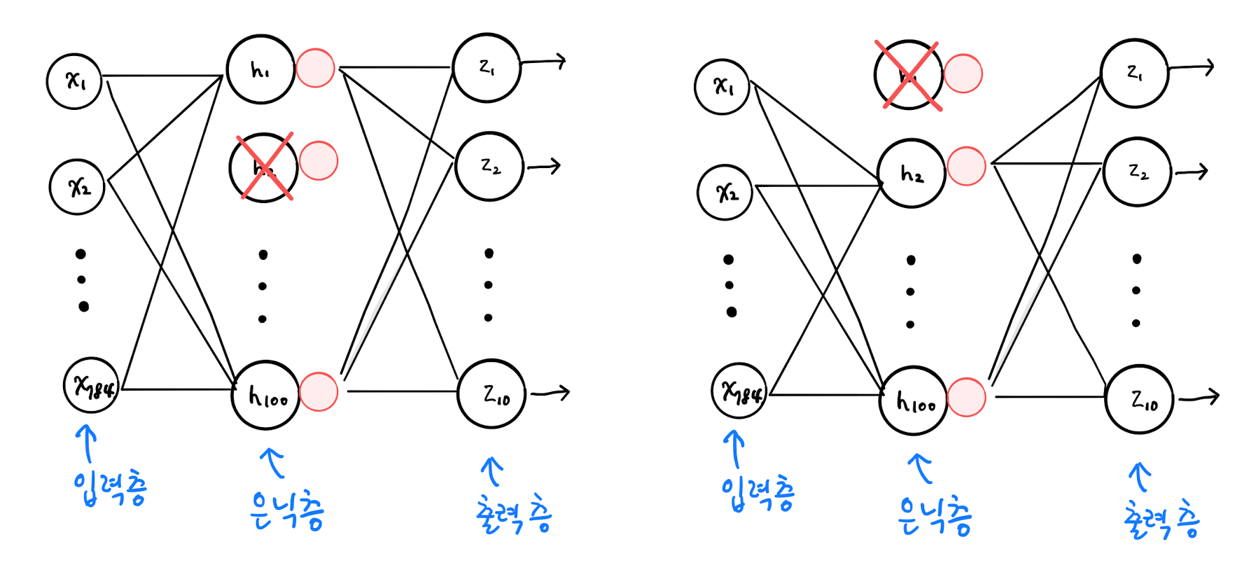

In [34]:
#또 다른 분석
#앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
#드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는것 처럼 상상하게 됨
#앙상블: 다좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
#   과대 적합을 막아주는 좋은 기법

#케라스에서 드롭아웃을 keras,layer,Dropout로 제공함
#어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬
#드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음
#model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가함

model=model_fn(keras.layers.Dropout(0,3))#30%정도 드롭 아웃
model.summary()#요약 확인
#은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음
#입력과 출력의 크기가 같음
#일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

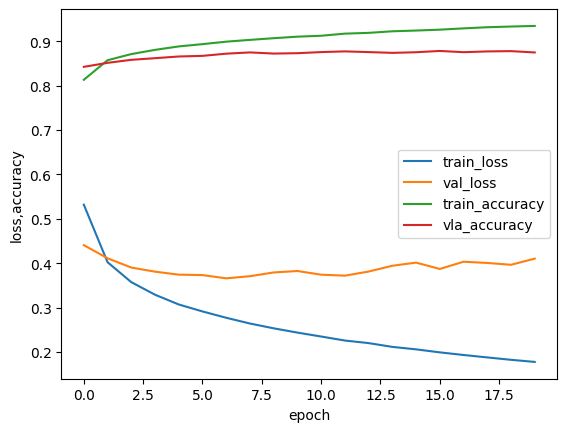

In [36]:
#주의사항: 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다
#훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
#텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음
#훈련 손실과 검증손실의 그래프를 그려보자
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.legend(['train_loss','val_loss','train_accuracy','vla_accuracy'])
plt.show()
#과대 적합이 확실히 줄어 듬 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
#20번의 에포크를 실행해서 결국 과대 적합이 되었음->10번만 해볼까???(조기 종료에서 해보자.)

In [37]:
#차후에 재활용 하기 위해서 모델 저장과 복원도 해본다.
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))
model.save('model-whole-ep10.keras')#모델 저장되어 나중에 쓸 수 있음
#케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights()메서드가 있다.
#텐서플로의 체크포인트 포멧으로 저장하지만  https://www.tensorflow.org/guide/checkpoint?hl=ko
#.h5일경우 HDF5포멧으로 저장함  https://geunuk.tistory.com/466
model.save_weights('model-ep10.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# 이제는 저장한 모델을 불려와 테스트를 진행 해보자
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 03:49 model-ep10.weights.h5
-rw-r--r-- 1 root root 979409 Nov 13 03:49 model-whole-ep10.keras


In [40]:
#실험 1
#훈련하지 않은 새로운 모델을 만들고 model-ep10.weights.h5파일에서
#훈련된 모델 파라미터를 읽어서 사용
#model_fn() 위와 동일한 모델
model=model_fn(keras.layers.Dropout(0.3))#훈련하지 않은 새로운 모델
model.load_weights('model-ep10.weights.h5')#이전에 저장했던 모델 파라미터를 로딩
#이때 사용하는 메서드는 save_weight()저장하는 데이터와 쌍을 이루는 load_weight가져오는 데이터 메서드임
#주의사항 load_weights()메서드를 사용하려면 save_weights()메서드로 저장했던 모델과
#정확히 같은 구조를 가져야함.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#모델의 검증 정확도를 확인해보자
import numpy as np
#predict()메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환(다중분류)
#패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에
#predict()메서드는 (12000,10)크기의 배열을 반환
#10개의 확률중 가장 큰 값의 인덱스를 골라(.argmax)타깃레이블과 비교하여 정확도를 계산해보자
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
#axis=-1배열의 마지막 차원을 따라 최대값을 고름
#검증세트는 2차원 배열이기 때문에 마지막 차원은 1이됨
#예를 들어 아래 그림처럼 5x3배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환함

#argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여 같으면 1이되고, 다르면 0이됨
#이를 평균으로 출력해봄(정확도)
print(np.mean(val_labels==val_target))#87.96평균

#axis=1이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
#axis=0이면 행을 따라 각 열의 최대값의 인덱스를 선택함
#그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교
#->두 배열에서 각 위치의 값이 같으면 1 다르면 0(평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.881


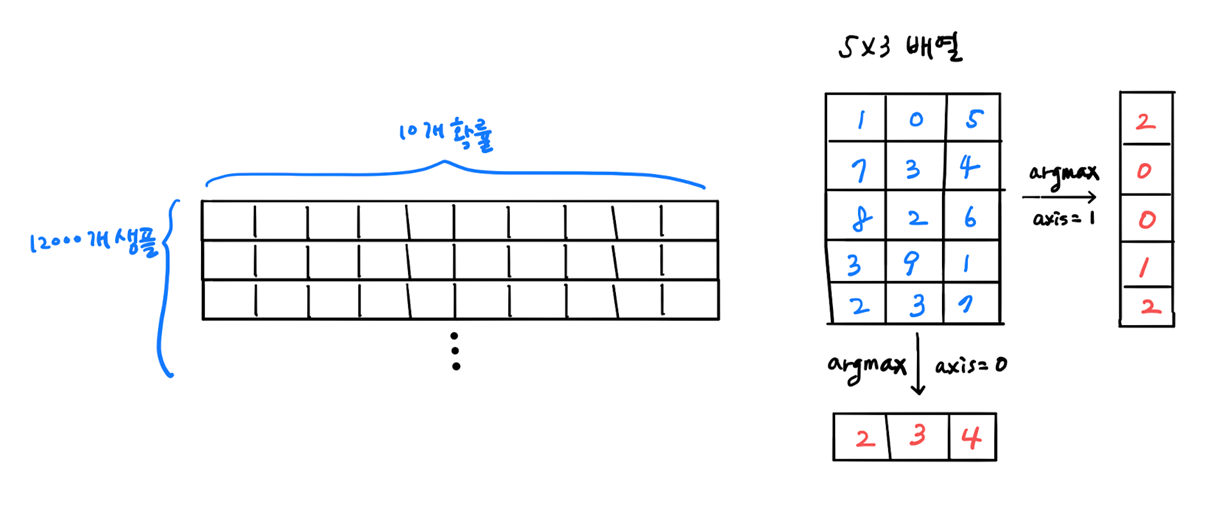

In [43]:
#모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해봄
model=keras.models.load_model('model-whole-ep10.keras')#load_model()저장된 케라스 파일 읽기
model.evaluate(val_scaled,val_target)#같은 모델을 불러 들였기 때문에 위와 정확도가 같음
#현 상태 분석:20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인
#모델을 과대적합되지 않는 에포크만큼 다시 훈련함
#모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구 해보자->케라스 콜백
# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8820 - loss: 0.3282


[0.33033308386802673, 0.8809999823570251]

In [48]:
#실험2
#아예 파일로 새로운 모델을 만들고 바로 사용해보자.
#추가적으로 콜백이라는 것을 활용해보자
#콜백: 훈련과정 중간에 어떤 작업을 수행할 수 잇게 하는 객체, 케라스.콜백 패키지에 있다.
#fit() 메서드의 callback매개변수에 리스트로 전달하여 사용
#지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 저장함
#save_best_only=True 매개변수를 지정하여 가장 낮은 검증점수를 만드는 모델을 저장할 수 잇다.

model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7309 - loss: 0.7625 - val_accuracy: 0.8435 - val_loss: 0.4216
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8394 - loss: 0.4480 - val_accuracy: 0.8635 - val_loss: 0.3765
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8547 - loss: 0.4033 - val_accuracy: 0.8667 - val_loss: 0.3642
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8606 - loss: 0.3821 - val_accuracy: 0.8747 - val_loss: 0.3426
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8695 - loss: 0.3618 - val_accuracy: 0.8761 - val_loss: 0.3398
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8707 - loss: 0.3546 - val_accuracy: 0.8730 - val_loss: 0.3426
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8717 - loss: 0.3422 - val_accuracy: 0.8759 - val_loss: 0.3374
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8758 - loss: 0.335

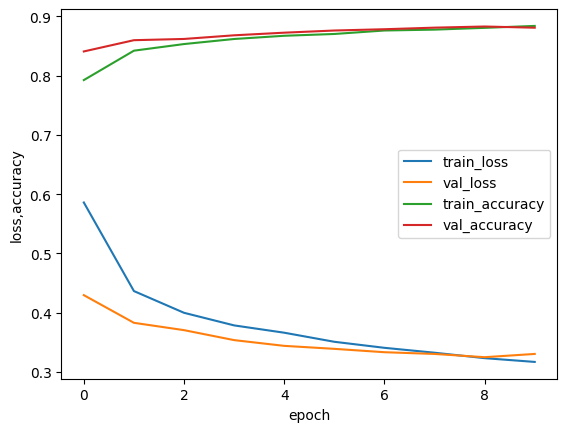

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()
model.evaluate(val_scaled,val_target)#검증세트의 성능 확인(33.10%,87.99%)에포크 9번
#결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함

In [50]:
#keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
#여전히 20번의 에포크 동안 훈련을 함
#사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요 없음
#이때 훈련을 종료하면 자원과 시간을 아낄 수 있음 ->조기종료(early stopping)

#조기종료는 딥러닝 분야에 많이 사용하는 기법
#에포크의 횟수를 제한하는 역할이지만 모델이 과대적합이 되는것을 막아주기도 함-규제방법중 하나


In [53]:
#케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
#patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지*patience:인내심
#restore-best_weights=True->가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)
#가장 낮은 검증 손실의 모델을 파일에 저장하고, 검증손실이 다시 상승할 때 훈련을 중지할 수 잇음
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)#얼리
#훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7302 - loss: 0.7721 - val_accuracy: 0.8449 - val_loss: 0.4330
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8370 - loss: 0.4539 - val_accuracy: 0.8699 - val_loss: 0.3703
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8512 - loss: 0.4110 - val_accuracy: 0.8648 - val_loss: 0.3653
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8607 - loss: 0.3928 - val_accuracy: 0.8728 - val_loss: 0.3518
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8641 - loss: 0.3728 - val_accuracy: 0.8752 - val_loss: 0.3401
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8674 - loss: 0.3608 - val_accuracy: 0.8811 - val_loss: 0.3346
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8714 - loss: 0.3517 - val_accuracy: 0.8790 - val_loss: 0.3361
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8739 - loss: 0.3388 - 